Here are examples in Python, which reads data using OPeNDAP
# Using _lower_ level python modules directly
## Retrieving a 2D slice

In [1]:
import netCDF4
import pyproj
import matplotlib.pyplot as plt

filename = "https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc"
file = netCDF4.Dataset(filename,"r")
print(file.variables["air_temperature_2m"].shape)
timestep = 0
ensemble_member = 0
print(file.variables["air_temperature_2m"][timestep,0,ensemble_member,:,:]);



(62, 1, 30, 1069, 949)
[[289.16177 289.2067  289.22916 ... 287.5392  287.61978 287.69107]
 [289.16617 289.18863 289.22476 ... 287.6017  287.6779  287.75406]
 [289.13492 289.17984 289.2111  ... 287.65543 287.7228  287.76773]
 ...
 [272.68716 272.7316  272.7814  ... 282.3478  282.57632 282.42838]
 [272.63297 272.6691  272.7184  ... 281.91275 282.11002 282.01138]
 [272.64664 272.64224 272.6735  ... 281.56754 281.68863 281.5226 ]]


## Finding nearest neighbour and reading timeseries for a lon,lat point

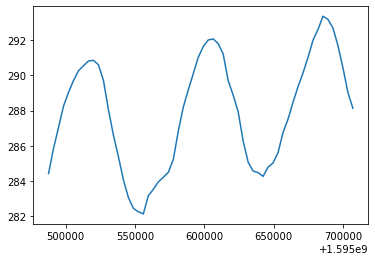

In [2]:
import netCDF4
import pyproj
import numpy as np
import matplotlib.pyplot as plt

filename = "https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc"
file = netCDF4.Dataset(filename,"r")

lat = 60
lon = 10
proj = pyproj.Proj(file.variables["projection_lambert"].proj4)

# Compute projected coordinates of lat/lon point
X,Y = proj(lon,lat)

# Find nearest neighbour
x = file.variables["x"][:]
y = file.variables["y"][:]

Ix = np.argmin(np.abs(x - X))
Iy = np.argmin(np.abs(y - Y))

times = file.variables["time"][:]
ensemble_member = 0
temperatures = file.variables["air_temperature_2m"][:,0,ensemble_member,Iy,Ix]

plt.plot(times,temperatures);

# Using higher-level python module: xarray
## Retrieving a 2D slice

(62, 1, 30, 1069, 949)


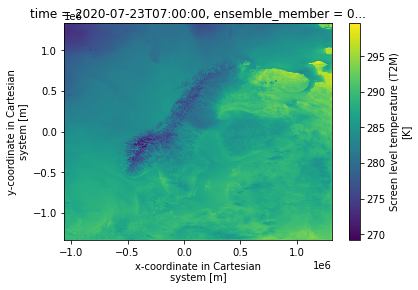

In [3]:
import xarray as xr

filename = "https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc"
file = xr.open_dataset(filename)
print( file.air_temperature_2m.shape)
timestep = 0
ensemble_member = 0
file.air_temperature_2m.isel(time = timestep,ensemble_member=ensemble_member).plot();



## Finding nearest neighbour and reading timeseries for a lon,lat point


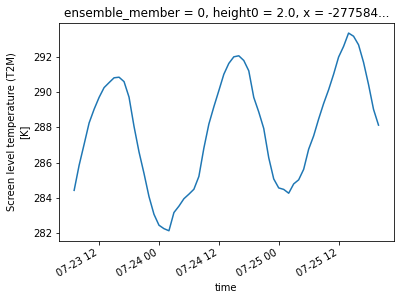

In [4]:
import xarray as xr
import pyproj


filename = "https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc"
file = xr.open_dataset(filename)
lat = 60
lon = 10
proj = pyproj.Proj(file.projection_lambert.proj4)

# Compute projected coordinates of lat/lon point
X,Y = proj(lon,lat)

# Find nearest neighbour and plot directly
file.air_temperature_2m.sel(x=X,y=Y,method="nearest").isel(ensemble_member=ensemble_member).plot();
